# First part: Data preparation:
First the data is loaded, labels are created, a PCA transform is applied on the features and then the transformed features are saved as well as the labels. 

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def fit_dimension_reduction(X, method, method_parameter):
    from sklearn.decomposition import PCA
    from sklearn.feature_selection import VarianceThreshold
    
    # Make an instance of the Model
    if method == 'PCA':
        model = PCA(method_parameter)
    
    elif method == 'varFilter':
        model = VarianceThreshold(method_parameter)
        
    model.fit(X)
    
    return model

In [3]:
def apply_dimension_reduction(model, X):
    X_transformed = model.transform(X)
    return X_transformed

Define the regions, cities and ethnic groups, as well as their coresponding latitude and longitude. We have conisdered a rectangular area around each city to diversify the output.

In [4]:
region_name = ['CHB', 'CHS', 'JPT', 'KHV', 'CDX', 'GIH', 'PJL', 'BEB', 'STU', 'ITU']
cities = ['Beijing','Guangzhou','Tokyo','Ho Chi Minh City','Xishuangbanna','Gandhinagar','Lahore','Dhaka','Jaffna','Hyderabad'] 
population = ['Han in Beijing','Southern Han','Japanese','Vietnamese','Dai','Gujarati','Punjabi','Bengali','Sri Lankan Tamil','Telugu']

Latitude = [39.9042,23.132,35.689722,10.8,22,23.216667,31.549722,
                23.763889,9.664722,17.37]
max_Latitude = [41.137542, 24.081613, 35.900157, 11.183393, 22.641073, 23.279532, 31.707452,
                23.919285, 9.698536, 17.615803]
min_Latitude = [39.387695, 22.513563, 35.483619, 10.395064, 21.108214, 23.16406, 31.264192,
                23.662323, 9.644477, 17.211049]

mid_Latitude = 0.5* np.add(max_Latitude,  min_Latitude)
diff_Latitude = 0.5 * np.subtract(max_Latitude,  min_Latitude)




Longitude = [116.4074,113.266,139.692222,106.65,100.8,72.683333,74.343611,
                 90.388889,80.016667,78.48]
max_Longitude = [117.605036, 114.140665, 139.993301, 106.976714, 101.855565, 72.686384, 74.545181, 
                 90.500259, 80.055916, 78.653976]
min_Longitude = [115.317468, 112.817546, 138.905958, 106.364863, 99.871885, 72.600057, 74.092682, 
                 90.336366, 80.000053, 78.154664]

mid_Longitude = 0.5* np.add(max_Longitude,  min_Longitude)
diff_Longitude = 0.5 * np.subtract(max_Longitude,  min_Longitude)


In [5]:
# train_all_mat_dict = dict()
# val_all_mat_dict = dict()
# test_all_mat_dict = dict()

all_mat_train = None
all_mat_test = None
all_mat_val = None

all_coord_train = None
all_coord_test = None
all_coord_val = None

all_label_train = None
all_label_test = None
all_label_val = None

data_length = np.zeros(len(region_name))


In [6]:
# ## Train data load


cont = 'EAS'
for i,reg_name in enumerate(region_name):
    print('loading train data for : ',reg_name)
    if i > 4:
        cont = 'SAS'
    
    # load train data
    address = 'M:\dataset_asia/gen_0/'+ cont + '_' + reg_name + '_train/mat_vcf_2d.npy'
    mat_temp = np.load(address)
    
    # add val data to train data
    address = 'M:\dataset_asia/gen_0/'+ cont + '_' + reg_name + '_val/mat_vcf_2d.npy'
    mat_temp_val = np.load(address)
    
    mat_temp = np.concatenate([mat_temp, mat_temp_val], axis=0)
    
    data_length[i] = len(mat_temp)
    
    # create labels
    random_multiplier = np.random.uniform(-1, 1, mat_temp.shape[0])
#     temp_Long = Longitude[i] + random_multiplier * diff_Longitude[i]
    temp_Long = Longitude[i] * np.ones(mat_temp.shape[0]) 
#     temp_Lati = Latitude[i] + random_multiplier * diff_Latitude[i]
    temp_Lati = Latitude[i] * np.ones(mat_temp.shape[0])
    coord_temp = np.vstack([temp_Long, temp_Lati])
    coord_temp = coord_temp.T
    
    temp_label = np.zeros(mat_temp.shape[0]) + i
    
    
    if all_mat_train is None:
        all_mat_train = mat_temp
        # create labels
        all_coord_train = coord_temp
        all_label_train = temp_label
        
    else:
        all_mat_train = np.concatenate([all_mat_train, mat_temp], axis=0)
        # create labels
        all_coord_train = np.concatenate([all_coord_train, coord_temp], axis=0)
        all_label_train = np.concatenate([all_label_train, temp_label], axis = 0) 


loading train data for :  CHB
loading train data for :  CHS
loading train data for :  JPT
loading train data for :  KHV
loading train data for :  CDX
loading train data for :  GIH
loading train data for :  PJL
loading train data for :  BEB
loading train data for :  STU
loading train data for :  ITU


In [7]:
# ## load test and validation 



cont = 'EAS'
for i,reg_name in enumerate(region_name):
    print('loading test data for : ', reg_name)
    if i > 4:
        cont = 'SAS'
    
    address = 'M:\dataset_asia/gen_0/' + cont + '_' + reg_name + '_val/mat_vcf_2d.npy'
    mat_temp = np.load(address)
    
    # create labels
    random_multiplier = np.random.uniform(-1, 1, mat_temp.shape[0])
    temp_Long = Longitude[i] * np.ones(mat_temp.shape[0])# + random_multiplier * diff_Longitude[i]
    temp_Lati = Latitude[i] * np.ones(mat_temp.shape[0])# + random_multiplier * diff_Latitude[i]
    coord_temp = np.vstack([temp_Long, temp_Lati])
    coord_temp = coord_temp.T
    
    temp_label = np.zeros(mat_temp.shape[0]) + i

    if all_mat_val is None:
        all_mat_val = mat_temp
        all_coord_val = coord_temp
        all_label_val = temp_label
    else:
        all_mat_val = np.concatenate([all_mat_val, mat_temp], axis=0)
        all_coord_val = np.concatenate([all_coord_val, coord_temp], axis=0)
        all_label_val = np.concatenate([all_label_val, temp_label], axis = 0) 
        
    # load test data
    address = 'M:\dataset_asia/gen_0/' + cont + '_' + reg_name + '_test/mat_vcf_2d.npy'
    mat_temp = np.load(address)
    
    # create labels
    random_multiplier = np.random.uniform(-1, 1, mat_temp.shape[0])
    temp_Long = mid_Longitude[i] * np.ones(mat_temp.shape[0])# + random_multiplier * diff_Longitude[i]
    temp_Lati = mid_Latitude[i] * np.ones(mat_temp.shape[0])# + random_multiplier * diff_Latitude[i]
    coord_temp = np.vstack([temp_Long, temp_Lati])
    coord_temp = coord_temp.T

    temp_label = np.zeros(mat_temp.shape[0]) + i
    
    if all_mat_test is None:
        all_mat_test = mat_temp
        all_coord_test = coord_temp
        all_label_test = temp_label
    else:
        all_mat_test = np.concatenate([all_mat_test, mat_temp], axis=0)
        all_coord_test = np.concatenate([all_coord_test, coord_temp], axis=0)
        all_label_test = np.concatenate([all_label_test, temp_label], axis = 0) 

        
        

loading test data for :  CHB
loading test data for :  CHS
loading test data for :  JPT
loading test data for :  KHV
loading test data for :  CDX
loading test data for :  GIH
loading test data for :  PJL
loading test data for :  BEB
loading test data for :  STU
loading test data for :  ITU


In [8]:
# create dataframe with cloumn names the position

indx = np.linspace(start = 0, stop = all_mat_train.shape[1]-1, num = all_mat_train.shape[1], dtype = int)

df_train = pd.DataFrame(all_mat_train, columns = indx)
df_test = pd.DataFrame(all_mat_test, columns = indx)
df_val = pd.DataFrame(all_mat_val, columns = indx)



In [9]:
# get the mean of datasets 
mu_train = np.mean(all_mat_train, axis=0)
mu_test = np.mean(all_mat_test, axis=0)
mu_val = np.mean(all_mat_val, axis=0)

# del all_mat_train, all_mat_test, all_mat_val

In [10]:
# normal score transform the training data
from sklearn.preprocessing import StandardScaler,  scale
scaler = StandardScaler()
scaler.fit(df_train)



df_train_scaled = pd.DataFrame(scaler.transform(all_mat_train),columns = df_train.columns) 
df_test_scaled = pd.DataFrame(scaler.transform(all_mat_test),columns = df_test.columns) 
df_val_scaled = pd.DataFrame(scaler.transform(all_mat_val),columns = df_val.columns) 


In [11]:
## train dimension reduction on features

# method options : 'PCA' or 'varFilter'
# method_parameter: for PCA the total variance preserved or number of principal components, for variance filter is the 
# vraiance treshold 
parameter = 0.95
method_dim = 'PCA'
dim_model = fit_dimension_reduction(X = df_train_scaled, method = method_dim, method_parameter = parameter)


In [12]:
# apply dimension reduction model on the features

df_train_transformed = apply_dimension_reduction(dim_model, df_train_scaled)
df_test_transformed = apply_dimension_reduction(dim_model, df_test_scaled)
df_val_transformed = apply_dimension_reduction(dim_model, df_val_scaled)


In [13]:
# pca1 = PCA(v)
# pca1.fit(df_train_scaled)
print(df_train_transformed.shape)
print(df_test_transformed.shape)
print(df_val_transformed.shape)

(1786, 1630)
(200, 1630)
(200, 1630)


The cell below is only used to visualize the scree chart and principal components, thus it is only used if PCA is chosen as dimension reduction  method

number of PCs are:    1630
[186. 190. 188. 178. 166. 186. 172. 152. 184. 184.]
['Beijing', 'Guangzhou', 'Tokyo', 'Ho Chi Minh City', 'Xishuangbanna', 'Gandhinagar', 'Lahore', 'Dhaka', 'Jaffna', 'Hyderabad']
[ 186.  376.  564.  742.  908. 1094. 1266. 1418. 1602. 1786.]


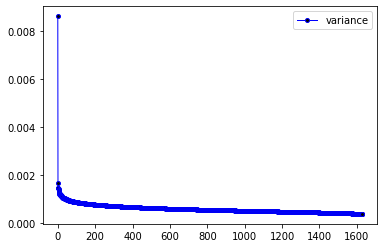

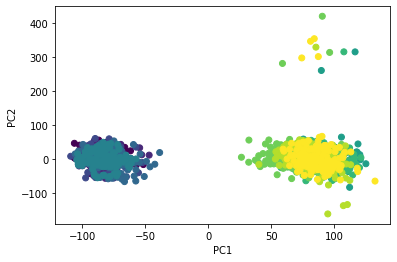

In [14]:
if method_dim == 'PCA':
    var_exp = dim_model.explained_variance_ratio_
    n_comp = dim_model.n_components_
    print('number of PCs are:   ', n_comp)

    sum_var = np.cumsum(var_exp)

    # plot scree chart 
    plt.plot(var_exp, color='blue', marker='o', markerfacecolor='black', markersize=4,  linewidth = 1, label = 'variance')
    plt.legend()


    ## plot scatter PCA 

    print(data_length)
    # plt.plot(all_label_train)
    print(cities)
    cum_data_length = np.cumsum(data_length)
    print(cum_data_length)

#     start1 = 0
#     stop1 = int(cum_data_length[0]-1)

#     start2 = int(cum_data_length[8])
#     stop2 = int(cum_data_length[9]-1)

    # labels = ['Beijing', 'Guangzhou']
    color_label = all_label_train
#     color_label = np.concatenate([all_label_train[start1:stop1], all_label_train[start2:stop2]], axis = 0)
    x_pca = df_train_transformed
#     x_pca = np.concatenate([df_train_transformed[start1:stop1, :], df_train_transformed[start2:stop2, :]], axis = 0)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x_pca[:,0], x_pca[:,2], c = color_label)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    # plt.legend()


Save the transformed data into files.

In [ ]:
# save the coordinates as Y_train
np.savez('Y', Y_train = all_coord_train, Y_test = all_coord_test)
# np.save('all_coord_val', all_coord_val)
save_all_data = False
save_scaled_data = False
save_transformed_data = True

if save_all_data:
    np.savez_compressed('all_data', X_train = all_mat_train, X_test = all_mat_test, 
                    Y_train = all_coord_train, Y_test = all_coord_test)

if save_scaled_data:
    np.savez_compressed('all_data_scaled', X_train = df_train_scaled.to_numpy(), X_test = df_test_scaled.to_numpy(), 
                   Y_train = all_coord_train, Y_test = all_coord_test)

if save_transformed_data:
    np.savez_compressed('all_data_transformed', X_train = df_train_transformed, X_test = df_test_transformed, 
                   Y_train = all_coord_train, Y_test = all_coord_test)

    


# Reset The Kernel NOW #
we need to restart the kernel and clear the variables and load the data and fit the models here.

In [72]:
# restart Kernel
%reset -f
import os, sys
import numpy as np
import matplotlib.pyplot as plt
# os._exit(00)


### Load the data ###

In [73]:
# load the dataset 
dataset = np.load('all_data_transformedlarge.npz')

X_train = dataset['X_train']
Y_train = dataset['Y_train']

X_test = dataset['X_test']
Y_test = dataset['Y_test']

# Part two: Training Models

First we load the data that was prepared in last part. Then train varous models on it.


In [74]:
# linear regression model 

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.utils.multiclass import unique_labels
import sklearn.metrics as metrics

from sklearn.preprocessing import StandardScaler,  scale
from scipy.stats import uniform



In [75]:
def plot_function(regressor, X, y, variable, plot):
    # Make predictions using the testing set

    y_predict = regressor.predict(X)



    # Root mean squared percentage error
    MSE = 1/len(y_predict)*np.sum(np.power(np.divide((y - y_predict), y), 2))
    RMSPE = 100* np.power(MSE, 0.5) 
    print('Root Mean squared error for ' + variable + ': %.2f'
          % RMSPE, '%')
    
    # The MSPE
    MSPE = 100/len(y_predict)*np.sum(np.power(np.divide((y- y_predict), y), 2))
    print('Mean Square Percentage Error for ' + variable + ': %.2f'
          % MSPE, '%')


    # The coefficient of determination: 1 is perfect prediction
    r2 = r2_score(y, y_predict)
    print('Coefficient of determination for ' + variable + ': %.2f' 
          % r2)
    
    
    # Mean averaged percentage error
    MAPE = 100/len(y_predict)*np.sum(np.absolute(np.divide((y - y_predict), y)))
    print('Mean Absolute Percentage Error for ' + variable + ': %.2f'
          % MAPE, '%')
    



    # # Plot outputs
    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111)

        plt.plot(y, label = 'true')
        plt.plot(y_predict, label = 'predicted')
        ax.set_ylabel(variable)
        ax.set_title('True '+ variable +' vs predicted')
        plt.legend()
        plt.show()

    
    return y_predict


In [76]:
# hyperparameter via cv. inputs are the regressor model, a dict of hyperparameters, no of folds and the data. 
def model_train_cv(model, hyperparam, cvparam, X, y):
    
    from sklearn.model_selection import RandomizedSearchCV
    best_model = RandomizedSearchCV(model, hyperparam, **cvparam)
    best_model = best_model.fit(X,y)
    
    return best_model



In [77]:
def train_lr_model(X, y, hyperparam, cvparam):
    from sklearn.linear_model import LinearRegression

    # Create linear regression object
    regressor = LinearRegression()

    # Train the model using the training sets
    regressor = model_train_cv(regressor, hyperparam, cvparam, X, y)

    return regressor

############################################
def train_svr_model(X, y, hyperparam, cvparam):
    from sklearn.svm import SVR
    from sklearn.preprocessing import StandardScaler,  scale

    # create object

    regressor = SVR()

    # normalize the data for SVR
    sc_X = StandardScaler()
    sc_Y = StandardScaler()

    X = sc_X.fit_transform(X)

    y = sc_Y.fit_transform(y.reshape(-1, 1))
    y= np.squeeze(y, axis = (1,))


    # Train the model using the training sets
    regressor = model_train_cv(regressor, hyperparam, cvparam, X, y)
    
    return regressor, sc_Y, sc_X

############################################
def train_dec_tree_reg(X, y, hyperparam, cvparam):
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor()
    
    regressor = model_train_cv(regressor, hyperparam, cvparam, X, y)
    
    return regressor
############################################
def train_gbr(X, y, hyperparam, cvparam):
    from sklearn.ensemble import GradientBoostingRegressor
    regressor = GradientBoostingRegressor()
    
    regressor = model_train_cv(regressor, hyperparam, cvparam, X, y)
    return regressor

############################################
def train_rfr(X, y, hyperparam, cvparam):
    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_jobs = 6)
    
    regressor = model_train_cv(regressor, hyperparam, cvparam, X, y)
    
    return regressor
    
############################################
def train_krr(X, y, hyperparam, cvparam):
    from sklearn.kernel_ridge import KernelRidge
    regressor = KernelRidge()
    
    regressor = model_train_cv(regressor, hyperparam, cvparam, X, y)
    return regressor

############################################
def train_abr(X, y, hyperparam, cvparam):
    from sklearn.ensemble import AdaBoostRegressor
    regressor = AdaBoostRegressor()
    regressor = model_train_cv(regressor, hyperparam, cvparam, X, y)
    return regressor

############################################
def train_hgb(X, y, hyperparam, cvparam):
    from sklearn.experimental import enable_hist_gradient_boosting  # noqa
    from sklearn.ensemble import HistGradientBoostingRegressor
    regressor = HistGradientBoostingRegressor()
    regressor = model_train_cv(regressor, hyperparam, cvparam, X, y)
    return regressor


############################################
def train_gpr(X,Y, params):
    from sklearn.gaussian_process import GaussianProcessRegressor
    regressor = GaussianProcessRegressor(**params)
    regressor.fit(X, Y)
    return regressor

############################################
def train_ardr(X,Y, params):
    from sklearn.linear_model import ARDRegression
    regressor = ARDRegression(**params)
    regressor.fit(X, Y)
    return regressor

############################################
def train_brr(X, y, hyperparam):
    from sklearn.linear_model import BayesianRidge
    regressor = BayesianRidge(**hyperparam)
    regressor = regressor.fit(X,y)
    return regressor

############################################
def train_hr(X, y, hyperparam, cvparam):
    from sklearn.linear_model import HuberRegressor
    regressor = HuberRegressor()
    regressor = model_train_cv(regressor, hyperparam, cvparam, X, y)
    return regressor

############################################
def train_tsr(X, y, hyperparam, cvparam):
    from sklearn.linear_model import TheilSenRegressor
    regressor = TheilSenRegressor()
    regressor = model_train_cv(regressor, hyperparam, cvparam, X, y)
    return regressor

############################################
def train_bagr(X, y, hyperparam, cvparam):
    from sklearn.ensemble import BaggingRegressor
    regressor = BaggingRegressor()
    regressor = model_train_cv(regressor, hyperparam, cvparam, X, y)
    return regressor



In [78]:
############################################
def train_vr(X,Y, estimators):
    from sklearn.ensemble import VotingRegressor
    regressor = VotingRegressor(estimators)
    regressor.fit(X, Y)
    return regressor


### Linear regression model

In [79]:
# train on long and lat data
hyperparam = dict()
cvparam = {'cv': 5, 'random_state': 138, 'n_iter':1}
regLong = train_lr_model(X_train, Y_train[:,0], hyperparam, cvparam)

hyperparam = dict()
cvparam = {'cv': 5, 'random_state': 138, 'n_iter':1}
regLati = train_lr_model(X_train, Y_train[:,1], hyperparam, cvparam)

hyperparam = dict()
cvparam = {'cv': 5, 'random_state': 138, 'n_iter':1}
multiTargetReg = train_lr_model(X_train, Y_train, hyperparam, cvparam)

Root Mean squared error for Longitude: 5.70 %
Mean Square Percentage Error for Longitude: 0.33 %
Coefficient of determination for Longitude: 0.92
Mean Absolute Percentage Error for Longitude: 4.66 %


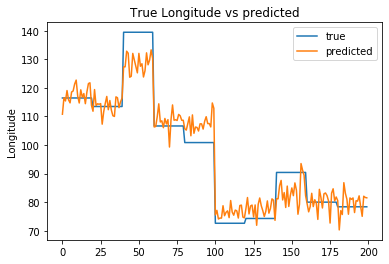

Root Mean squared error for Latitude: 46.31 %
Mean Square Percentage Error for Latitude: 21.45 %
Coefficient of determination for Latitude: 0.51
Mean Absolute Percentage Error for Latitude: 30.65 %


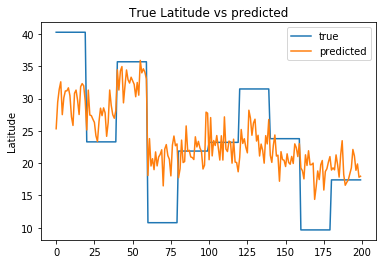

In [80]:
long_pred = plot_function(regLong, X_test, Y_test[:,0], variable = 'Longitude', plot = True)
lati_pred = plot_function(regLati, X_test, Y_test[:,1], variable = 'Latitude', plot = True)

In [81]:
# Make predictions using the testing set
# overall_pred = multiTargetReg.predict(X_test)

long_pred = plot_function(multiTargetReg, X_test, Y_test, variable = 'Overall prediction', plot = False)


Root Mean squared error for Overall prediction: 46.66 %
Mean Square Percentage Error for Overall prediction: 21.78 %
Coefficient of determination for Overall prediction: 0.72
Mean Absolute Percentage Error for Overall prediction: 35.31 %


### Support vector regression

In [78]:
# fit the svr model 

params = {'kernel': 'poly', 'C': 10, 'gamma': 10, 'epsilon': 0.1, 'degree': 2}
long_svr, sc_Y_long, _ = train_svr_model(X_train,Y_train[:,0], params)


params = {'kernel': 'poly', 'C': 10, 'gamma': 10, 'epsilon': 0.1, 'degree': 2}
lati_svr, sc_Y_lati, sc_X = train_svr_model(X_train,Y_train[:,1], params)


Root Mean squared error for Longitude: 16.96 %
Root Mean squared error for Latitude: 58.15 %
Mean Square Percentage Error for Longitude: 2.88 %
Mean Square Percentage Error for Latitude: 33.81 %
Coefficient of determination for longitude: 0.51
Coefficient of determination for latitude: 0.24
Mean Absolute Percentage Error for longitude: 11.83 %
Mean Absolute Percentage Error for latitude: 38.21 %


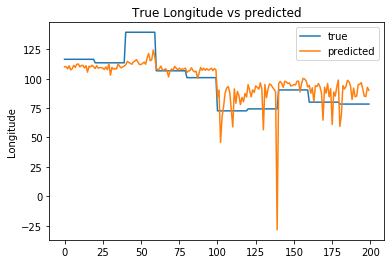

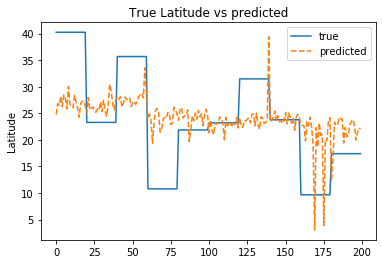

In [90]:
y_predict = long_svr.predict (sc_X.fit_transform(X_test))
long_pred = sc_Y_long.inverse_transform (y_predict)


y_predict = lati_svr.predict (sc_X.fit_transform(X_test))
lati_pred = sc_Y_lati.inverse_transform (y_predict)




# Root mean squared percentage error
MSE = 1/len(long_pred)*np.sum(np.power(np.divide((Y_test[:,0] - long_pred), Y_test[:,0]), 2))
RMSPE = 100* np.power(MSE, 0.5) 
print('Root Mean squared error for Longitude: %.2f'
      % RMSPE, '%')

MSE = 1/len(lati_pred)*np.sum(np.power(np.divide((Y_test[:,1] - lati_pred), Y_test[:,1]), 2))
RMSPE = 100* np.power(MSE, 0.5) 
print('Root Mean squared error for Latitude: %.2f'
      % RMSPE, '%')

# The MSPE
MSPE = 100/len(long_pred)*np.sum(np.power(np.divide((Y_test[:,0] - long_pred), Y_test[:,0]), 2))
print('Mean Square Percentage Error for Longitude: %.2f'
      % MSPE, '%')
MSPE = 100/len(lati_pred)*np.sum(np.power(np.divide((Y_test[:,1] - lati_pred), Y_test[:,1]), 2))
print('Mean Square Percentage Error for Latitude: %.2f'
      % MSPE, '%')



# The coefficient of determination: 1 is perfect prediction
r2 =  r2_score(Y_test[:,0], long_pred)
print('Coefficient of determination for longitude: %.2f'
      % r2)

r2 = r2_score(Y_test[:,1], lati_pred)
print('Coefficient of determination for latitude: %.2f'
      % r2)

# Mean averaged percentage error
MAPE = 100/len(long_pred)*np.sum(np.absolute(np.divide((Y_test[:,0] - long_pred), Y_test[:,0])))
print('Mean Absolute Percentage Error for longitude: %.2f'
      % MAPE, '%')

MAPE = 100/len(lati_pred)*np.sum(np.absolute(np.divide((Y_test[:,1] - lati_pred), Y_test[:,1])))
print('Mean Absolute Percentage Error for latitude: %.2f'
      % MAPE, '%')



# # Plot outputs

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(Y_test[:,0], label = 'true')
plt.plot(long_pred, label = 'predicted')
ax.set_ylabel('Longitude')
ax.set_title('True Longitude vs predicted')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(Y_test[:,1],  label = 'true')
plt.plot(lati_pred, '--', label = 'predicted')
ax.set_ylabel('Latitude')
ax.set_title('True Latitude vs predicted')
plt.legend()
plt.show()

### Decision tree regression

In [82]:
## regression tree
max_depth = [6 ]
min_samples_split =[7]
min_samples_leaf = [2, 3]
hyperparam = dict(max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
cvparam = {'cv': 5, 'random_state': 138, 'n_jobs':6}
long_dt_reg = train_dec_tree_reg(X_train, Y_train[:,0], hyperparam, cvparam)

max_depth = [6 ]
min_samples_split =[7]
min_samples_leaf = [4, 5]
hyperparam = dict(max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
cvparam = {'cv': 5, 'random_state': 138, 'n_jobs': 6}
lati_dt_reg = train_dec_tree_reg(X_train, Y_train[:,1], hyperparam, cvparam)



Root Mean squared error for Longitude: 6.70 %
Mean Square Percentage Error for Longitude: 0.45 %
Coefficient of determination for Longitude: 0.89
Mean Absolute Percentage Error for Longitude: 4.86 %


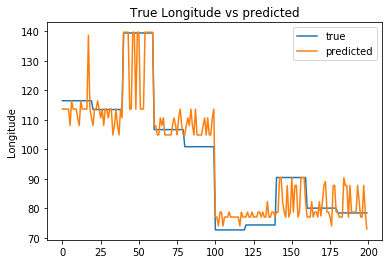

Root Mean squared error for Latitude: 51.90 %
Mean Square Percentage Error for Latitude: 26.94 %
Coefficient of determination for Latitude: 0.33
Mean Absolute Percentage Error for Latitude: 35.09 %


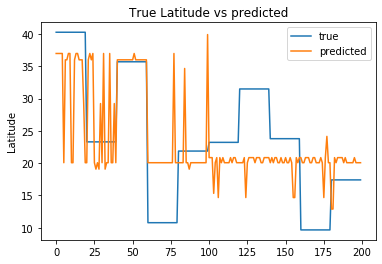

In [83]:
# Make predictions using the testing set
long_pred = plot_function(long_dt_reg, X_test, Y_test[:,0], variable = 'Longitude', plot = True)
lati_pred = plot_function(lati_dt_reg, X_test, Y_test[:,1], variable = 'Latitude', plot = True)

In [84]:
# print('Best depth:', long_dt_reg.best_estimator_.get_params()['max_depth'])
# print('Best min_samples_split:', long_dt_reg.best_estimator_.get_params()['min_samples_split'])
# print('Best min_samples_leaf:', long_dt_reg.best_estimator_.get_params()['min_samples_leaf'])

print('Best depth:', lati_dt_reg.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', lati_dt_reg.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', lati_dt_reg.best_estimator_.get_params()['min_samples_leaf'])

Best depth: 6
Best min_samples_split: 7
Best min_samples_leaf: 4


### Gradient boosting regression

In [85]:
n_estimators = [100, 200]
max_depth =[3]
min_samples_split = [6, 10]
learning_rate = [0.01]
loss = ['ls']#, 'huber', 'lad']
hyperparam = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, 
                 learning_rate = learning_rate, loss = loss)

cvparam = {'cv': 5, 'random_state': 138, 'n_jobs':6}
long_gbr_reg = train_gbr(X_train,Y_train[:,0], hyperparam, cvparam)

n_estimators = [100, 200]
max_depth =[3]
min_samples_split = [6, 10]
learning_rate = [0.01]
loss = ['ls']#, 'huber', 'lad']
hyperparam = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, 
                 learning_rate = learning_rate, loss = loss)

cvparam = {'cv': 5, 'random_state': 138, 'n_jobs':6}
lati_gbr_reg = train_gbr(X_train,Y_train[:,1], hyperparam, cvparam)



Root Mean squared error for Longitude: 6.84 %
Mean Square Percentage Error for Longitude: 0.47 %
Coefficient of determination for Longitude: 0.89
Mean Absolute Percentage Error for Longitude: 5.73 %


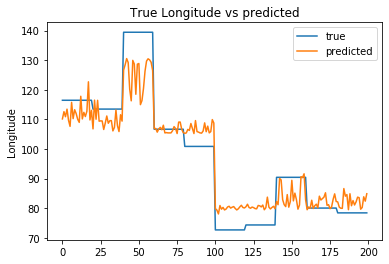

Root Mean squared error for Latitude: 54.32 %
Mean Square Percentage Error for Latitude: 29.51 %
Coefficient of determination for Latitude: 0.33
Mean Absolute Percentage Error for Latitude: 35.83 %


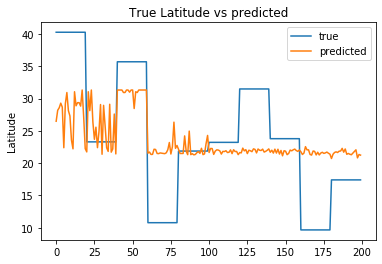

In [86]:
# Make predictions using the testing set
long_pred = plot_function(long_gbr_reg, X_test, Y_test[:,0], variable = 'Longitude', plot = True)
lati_pred = plot_function(lati_gbr_reg, X_test, Y_test[:,1], variable = 'Latitude', plot = True)

# long_pred, lati_pred = plot_function(long_gbr_reg, lati_gbr_reg, X_test, Y_test)

### Random forest regression

In [87]:
n_estimators = [200]#, 200, 300, 400]
max_depth =[3, 4, 6]
min_samples_split = [5, 8]
hyperparam = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split)

cvparam = {'cv': 5, 'random_state': 138, 'n_jobs':6}
long_rfr_reg = train_rfr(X_train,Y_train[:,0], hyperparam, cvparam)

n_estimators = [200]#, 200, 300, 400]
max_depth =[3]#, 3, 4, 5, 6]
min_samples_split = [4]#, 6]
hyperparam = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split)
cvparam = {'cv': 5, 'random_state': 138, 'n_jobs':6}
lati_rfr_reg = train_rfr(X_train,Y_train[:,1], hyperparam, cvparam)



Root Mean squared error for Longitude: 6.04 %
Mean Square Percentage Error for Longitude: 0.37 %
Coefficient of determination for Longitude: 0.91
Mean Absolute Percentage Error for Longitude: 4.57 %


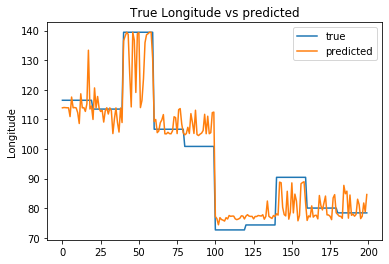

Root Mean squared error for Latitude: 49.43 %
Mean Square Percentage Error for Latitude: 24.43 %
Coefficient of determination for Latitude: 0.39
Mean Absolute Percentage Error for Latitude: 33.56 %


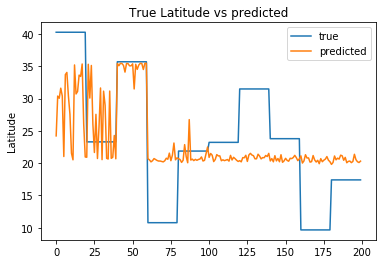

In [88]:
# Make predictions using the testing set
long_pred = plot_function(long_rfr_reg, X_test, Y_test[:,0], variable = 'Longitude', plot = True)
lati_pred = plot_function(lati_rfr_reg, X_test, Y_test[:,1], variable = 'Latitude', plot = True)

# long_pred, lati_pred = plot_function(long_rfr_reg, lati_rfr_reg, X_test, Y_test)

In [89]:
print('Best depth:', long_rfr_reg.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', long_rfr_reg.best_estimator_.get_params()['min_samples_split'])


Best depth: 6
Best min_samples_split: 8


### Kernel Ridge regression

In [ ]:
# params = {'kernel': 'linear', 'gamma': 0.8}
# long_krr_reg = train_krr(X_train,Y_train[:,0], params)

# params = {'kernel': 'linear', 'gamma': 0.8}
# lati_krr_reg = train_krr(X_train,Y_train[:,1], params)

In [ ]:
# # Make predictions using the testing set
# long_pred, lati_pred = plot_function(long_krr_reg, lati_krr_reg, X_test, Y_test)

### An AdaBoost regression

In [ ]:
# params = {'random_state': 138, 'n_estimators': 100}
# long_ab_reg = train_abr(X_train,Y_train[:,0], params)

# params = {'random_state': 138, 'n_estimators': 100}
# lati_ab_reg = train_abr(X_train,Y_train[:,1], params)

In [ ]:
# # Make predictions using the testing set
# long_pred, lati_pred = plot_function(long_krr_reg, lati_krr_reg, X_test, Y_test)

### Stacking Regressor

In [ ]:
# params = {'random_state': 138, 'n_estimators': 100}
# long_ab_reg = train_abr(X_train,Y_train[:,0], params)

# params = {'random_state': 138, 'n_estimators': 100}
# lati_ab_reg = train_abr(X_train,Y_train[:,1], params)

In [ ]:
# # Make predictions using the testing set
# long_pred, lati_pred = plot_function(long_krr_reg, lati_krr_reg, X_test, Y_test)

### Guassian process regression

In [100]:
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

kernel = DotProduct() + WhiteKernel()
params = {'kernel': kernel, 'random_state': 138}
long_gpr_reg = train_gpr(X_train,Y_train[:,0], params)

kernel = DotProduct() + WhiteKernel()
params = {'kernel': kernel, 'random_state': 138}
lati_gpr_reg = train_gpr(X_train,Y_train[:,1], params)


Root Mean squared error for Longitude: 6.84 %
Mean Square Percentage Error for Longitude: 0.47 %
Coefficient of determination for Longitude: 0.89
Mean Absolute Percentage Error for Longitude: 5.73 %


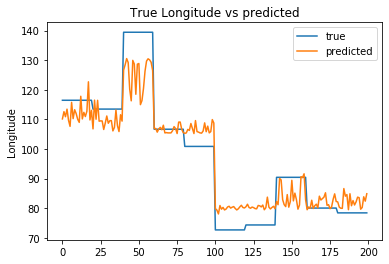

Root Mean squared error for Longitude: 46.31 %
Mean Square Percentage Error for Longitude: 21.45 %
Coefficient of determination for Longitude: 0.51
Mean Absolute Percentage Error for Longitude: 30.65 %


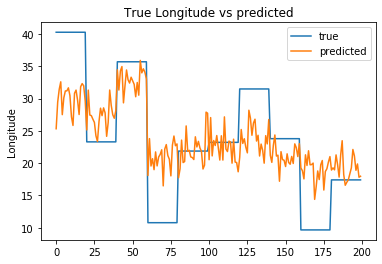

In [101]:
# Make predictions using the testing set
long_pred = plot_function(long_gbr_reg, X_test, Y_test[:,0], variable = 'Longitude', plot = True)
lati_pred = plot_function(lati_gpr_reg, X_test, Y_test[:,1], variable = 'Longitude', plot = True)


### Automatic Relevance Determination Regression 

In [105]:
params = {'compute_score': True}
long_ardr_reg = train_ardr(X_train,Y_train[:,0], params)

params = {'compute_score': True}
lati_ardr_reg = train_ardr(X_train,Y_train[:,1], params)



Root Mean squared error for Longitude: 6.11 %
Mean Square Percentage Error for Longitude: 0.37 %
Coefficient of determination for Longitude: 0.91
Mean Absolute Percentage Error for Longitude: 4.99 %


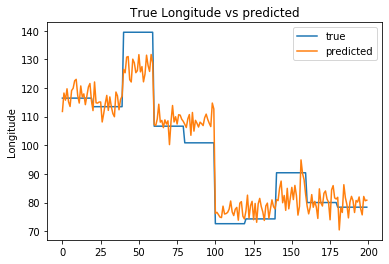

Root Mean squared error for Longitude: 49.10 %
Mean Square Percentage Error for Longitude: 24.11 %
Coefficient of determination for Longitude: 0.48
Mean Absolute Percentage Error for Longitude: 31.96 %


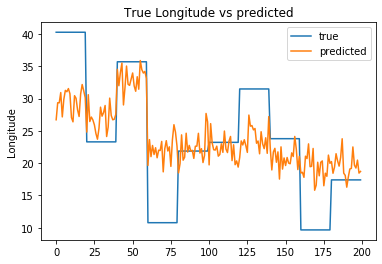

In [106]:
# Make predictions using the testing set
long_pred = plot_function(long_ardr_reg, X_test, Y_test[:,0], variable = 'Longitude', plot = True)
lati_pred = plot_function(lati_ardr_reg, X_test, Y_test[:,1], variable = 'Longitude', plot = True)


### Bayesian Ridge regression

In [107]:
params = {'compute_score': True}
long_brr_reg = train_brr(X_train,Y_train[:,0], params)

params = {'compute_score': True}
lati_brr_reg = train_brr(X_train,Y_train[:,1], params)


Root Mean squared error for Longitude: 5.83 %
Mean Square Percentage Error for Longitude: 0.34 %
Coefficient of determination for Longitude: 0.92
Mean Absolute Percentage Error for Longitude: 4.78 %


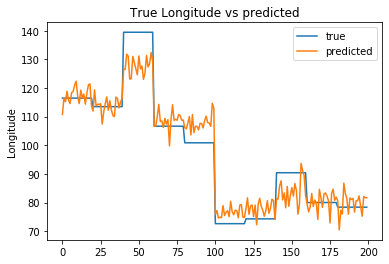

Root Mean squared error for Longitude: 48.25 %
Mean Square Percentage Error for Longitude: 23.28 %
Coefficient of determination for Longitude: 0.48
Mean Absolute Percentage Error for Longitude: 31.83 %


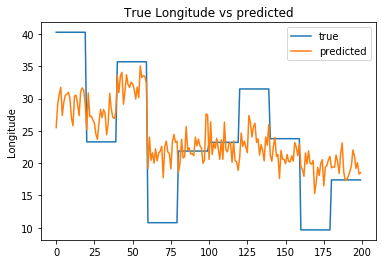

In [108]:
# Make predictions using the testing set

long_pred = plot_function(long_brr_reg, X_test, Y_test[:,0], variable = 'Longitude', plot = True)
lati_pred = plot_function(lati_brr_reg, X_test, Y_test[:,1], variable = 'Longitude', plot = True)

### Huber regression

In [90]:
alpha = [1e-6]
epsilon =[50]
max_iter = [100]
hyperparam = dict(alpha = alpha, epsilon = epsilon, max_iter = max_iter)

cvparam = {'cv': 5, 'random_state': 138}
long_hr_reg = train_hr(X_train,Y_train[:,0], hyperparam, cvparam)


# params = {'alpha': 1e-6, 'epsilon': 1, 'max_iter': 50}
# long_hr_reg = train_hr(X_train,Y_train[:,0], params)

alpha = [1e-6]
epsilon =[50]
max_iter = [100]
hyperparam = dict(alpha = alpha, epsilon = epsilon, max_iter = max_iter)

cvparam = {'cv': 5, 'random_state': 138}
lati_hr_reg = train_hr(X_train,Y_train[:,1], hyperparam, cvparam)

# params = {'alpha': 1e-6, 'epsilon': 1, 'max_iter': 50}
# lati_hr_reg = train_hr(X_train,Y_train[:,1], params)


Root Mean squared error for Longitude: 5.70 %
Mean Square Percentage Error for Longitude: 0.33 %
Coefficient of determination for Longitude: 0.92
Mean Absolute Percentage Error for Longitude: 4.66 %


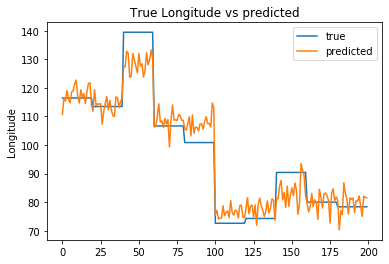

Root Mean squared error for Longitude: 46.31 %
Mean Square Percentage Error for Longitude: 21.45 %
Coefficient of determination for Longitude: 0.51
Mean Absolute Percentage Error for Longitude: 30.65 %


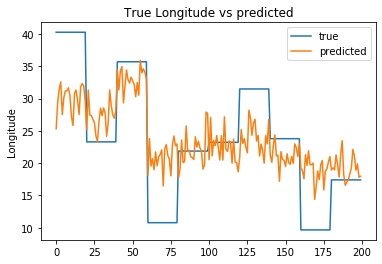

In [116]:
# Make predictions using the testing set
long_pred = plot_function(long_hr_reg, X_test, Y_test[:,0], variable = 'Longitude', plot = True)
lati_pred = plot_function(lati_hr_reg, X_test, Y_test[:,1], variable = 'Longitude', plot = True)

In [ ]:
# View best hyperparameters
# print('Best alpha:', long_hr_reg.best_estimator_.get_params()['alpha'])


### Theil-Sen Regression

In [ ]:
# params = {'random_state': 138}
# long_tsr_reg = train_tsr(X_train,Y_train[:,0], params)
 
# params = {'random_state': 138}
# lati_tsr_reg = train_tsr(X_train,Y_train[:,1], params)


In [ ]:
# # Make predictions using the testing set
# long_pred, lati_pred = plot_function(long_tsr_reg, lati_tsr_reg, X_test, Y_test)

### Bagging regression

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
base_estimator = LinearRegression()
extra_tree = ExtraTreeRegressor(random_state=0)
long_bagr_reg = BaggingRegressor(extra_tree, random_state=0).fit(X_train,Y_train[:,0])
# params = {'base_estimator': base_estimator, 'random_state': 138}
# long_bagr_reg = train_bagr(X_train,Y_train[:,0], params)
extra_tree = ExtraTreeRegressor(random_state=0)
lati_bagr_reg = BaggingRegressor(extra_tree, random_state=0).fit(X_train,Y_train[:,1])

# base_estimator = LinearRegression()
# params = {'base_estimator': base_estimator, 'random_state': 138}
# lati_bagr_reg = train_bagr(X_train,Y_train[:,1], params)




Root Mean squared error for Longitude: 6.13 %
Mean Square Percentage Error for Longitude: 0.38 %
Coefficient of determination for Longitude: 0.90
Mean Absolute Percentage Error for Longitude: 4.74 %


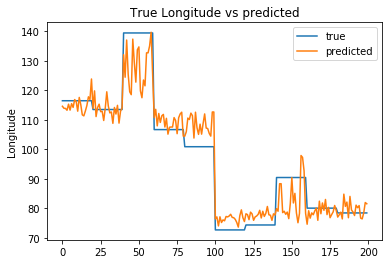

Root Mean squared error for Longitude: 53.05 %
Mean Square Percentage Error for Longitude: 28.14 %
Coefficient of determination for Longitude: 0.39
Mean Absolute Percentage Error for Longitude: 34.20 %


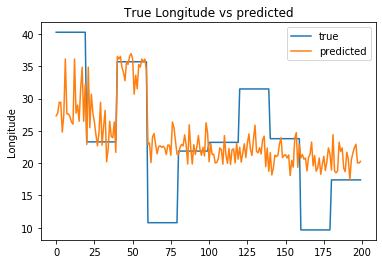

In [118]:
# Make predictions using the testing set
# long_pred, lati_pred = plot_function(long_bagr_reg, lati_bagr_reg, X_test, Y_test)
long_pred = plot_function(long_bagr_reg, X_test, Y_test[:,0], variable = 'Longitude', plot = True)
lati_pred = plot_function(lati_bagr_reg, X_test, Y_test[:,1], variable = 'Longitude', plot = True)

### Voting regression :
A metamodel to stack selected models 

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

params = {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
# reg1 = GradientBoostingRegressor(**params)
params = {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2,
          'random_state': 138}
reg2 = RandomForestRegressor(**params)
reg3 = LinearRegression()
estimators = [('rf', reg2), ('lr', reg3)]
long_vr_reg = train_vr(X_train,Y_train[:,0], estimators)

##################################################################

params = {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
# reg1 = GradientBoostingRegressor(**params)
params = {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2,
          'random_state': 138}
reg2 = RandomForestRegressor(**params)
reg3 = LinearRegression()
estimators = [('rf', reg2), ('lr', reg3)]
lati_vr_reg = train_vr(X_train,Y_train[:,1], estimators)




In [ ]:
# Make predictions using the testing set
long_pred, lati_pred = plot_function(long_vr_reg, lati_vr_reg, X_test, Y_test)

ridge regression train score for longitude with low alpha: 0.9969692867019272
ridge regression train score for longitude with high alpha: 0.9969558408209238
ridge regression train score for latitude with low alpha: 0.9789800138452383
ridge regression train score for latitude with high alpha: 0.9789051987473225
ridge regression test score for longitude with low alpha: 0.9233006808003051
ridge regression test score for longitude with high alpha: 0.9227448001672888
ridge regression test score for latitude with low alpha: 0.5123935258834575
ridge regression test score for latitude with high alpha: 0.5106829146637978


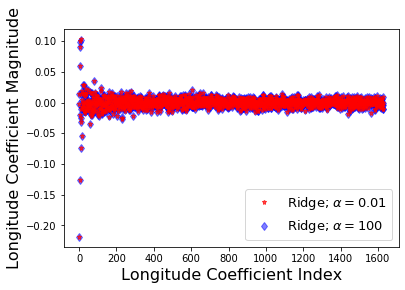

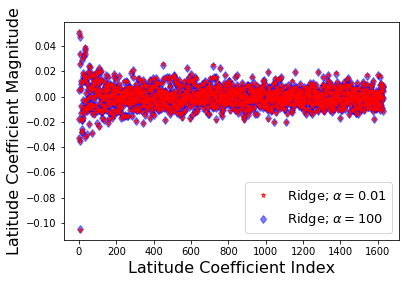

In [93]:
# Ridge regression model 
from sklearn.linear_model import Ridge


# shrinking coefficient magnitude using Ridge regression
# Create Ridge regression object for alpha = 0.01
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
Ridge_Longitude = Ridge(alpha=0.01)
Ridge_Latitude = Ridge(alpha=0.01)

# Train the model using the training sets
Ridge_Longitude.fit(X_train, Y_train[:,0])
Ridge_Latitude.fit(X_train, Y_train[:,1])

##### Create Ridge regression object for alpha=100
Ridge100_Longitude = Ridge(alpha=10000)
Ridge100_Latitude = Ridge(alpha=10000)
Ridge100_Longitude.fit(X_train, Y_train[:,0])
Ridge100_Latitude.fit(X_train, Y_train[:,1])

####  train and test score for alpha=0.01
Ridge_train_score_Longitude = Ridge_Longitude.score(X_train, Y_train[:,0])
Ridge_train_score_Latitude = Ridge_Latitude.score(X_train, Y_train[:,1])

Ridge_test_score_Longitude = Ridge_Longitude.score(X_test, Y_test[:,0])
Ridge_test_score_Latitude = Ridge_Latitude.score(X_test, Y_test[:,1])

####  train and test score for alpha=100
Ridge100_train_score_Longitude = Ridge100_Longitude.score(X_train, Y_train[:,0])
Ridge100_train_score_Latitude = Ridge100_Latitude.score(X_train, Y_train[:,1])

Ridge100_test_score_Longitude = Ridge100_Longitude.score(X_test, Y_test[:,0])
Ridge100_test_score_Latitude = Ridge100_Latitude.score(X_test, Y_test[:,1])



print ("ridge regression train score for longitude with low alpha:", Ridge_train_score_Longitude)
print ("ridge regression train score for longitude with high alpha:", Ridge100_train_score_Longitude)
print ("====================================================")

print ("ridge regression train score for latitude with low alpha:", Ridge_train_score_Latitude)
print ("ridge regression train score for latitude with high alpha:", Ridge100_train_score_Latitude)
print ("====================================================")

print ("ridge regression test score for longitude with low alpha:", Ridge_test_score_Longitude)
print ("ridge regression test score for longitude with high alpha:", Ridge100_test_score_Longitude)
print ("====================================================")

print ("ridge regression test score for latitude with low alpha:", Ridge_test_score_Latitude)
print ("ridge regression test score for latitude with high alpha:", Ridge100_test_score_Latitude)

plt.plot(Ridge_Longitude.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(Ridge100_Longitude.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.xlabel('Longitude Coefficient Index',fontsize=16)
plt.ylabel('Longitude Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

plt.plot(Ridge_Latitude.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(Ridge100_Latitude.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.xlabel('Latitude Coefficient Index',fontsize=16)
plt.ylabel('Latitude Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

lasso_train_score_Longitude: 0.9907171137953407
lasso_train_score_Latitude: 0.9459998924634058
lasso_test_score_Longitude:  0.9176167175417853
lasso_test_score_Latitude:  0.4932320729303066
number of features used longitude:  1147
number of features used latitude:  1225
lasso_train_score_Longitude for alpha=0.01: 0.9969684866574406
lasso_train_score_Latitude for alpha=0.01: 0.9789760043273308
lasso_test_score_Longitude for alpha=0.01:  0.9232468897668541
lasso_test_score_Latitude for alpha=0.01:  0.5122081915669314
number of features used longitude for alpha =0.01:  1623
number of features used latitude for alpha =0.01:  1627
lasso_train_score_Longitude for alpha=0.0001: 0.9969692866216935
lasso_train_score_Latitude for alpha=0.0001: 0.9789800134435991
lasso_test_score_Longitude for alpha=0.0001:  0.92330014622761
lasso_test_score_Latitude for alpha=0.0001:  0.5123916727559046
number of features used longitude for alpha =0.0001:  1630
number of features used latitude for alpha =0.0001:

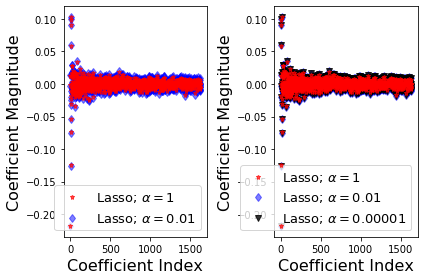

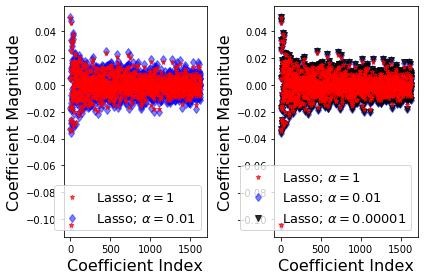

In [94]:
from sklearn.linear_model import Lasso

# Lasso regression not only helps in reducing over-fitting but it can help us in feature selection 
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected

#### Lasso
lasso_Long = Lasso()
lasso_Lat = Lasso()


lasso_Long.fit(X_train, Y_train[:,0])
lasso_Lat.fit(X_train, Y_train[:,1])

lasso_train_score_Longitude = lasso_Long.score(X_train, Y_train[:,0])
lasso_train_score_Latitude = lasso_Lat.score(X_train, Y_train[:,1])

lasso_test_score_Longitude = lasso_Long.score(X_test, Y_test[:,0])
lasso_test_score_Latitude = lasso_Lat.score(X_test, Y_test[:,1])

coeff_used_Longitude = np.sum(lasso_Long.coef_!=0)
coeff_used_Latitude = np.sum(lasso_Lat.coef_!=0)


print ("lasso_train_score_Longitude:", lasso_train_score_Longitude)
print ("lasso_train_score_Latitude:", lasso_train_score_Latitude)
print ("====================================================")

print ("lasso_test_score_Longitude: ", lasso_test_score_Longitude)
print ("lasso_test_score_Latitude: ", lasso_test_score_Latitude)
print ("====================================================")

print ("number of features used longitude: ", coeff_used_Longitude)
print ("number of features used latitude: ", coeff_used_Latitude)
print ("====================================================")
print ("====================================================")

######################### Lasso with alpha = 0.01
lasso001_Long = Lasso(alpha=0.01, max_iter=10e5)
lasso001_Lat = Lasso(alpha=0.01, max_iter=10e5)


lasso001_Long.fit(X_train, Y_train[:,0])
lasso001_Lat.fit(X_train, Y_train[:,1])

lasso001_train_score_Longitude = lasso001_Long.score(X_train, Y_train[:,0])
lasso001_train_score_Latitude = lasso001_Lat.score(X_train, Y_train[:,1])

lasso001_test_score_Longitude = lasso001_Long.score(X_test, Y_test[:,0])
lasso001_test_score_Latitude = lasso001_Lat.score(X_test, Y_test[:,1])

coeff_used001_Longitude = np.sum(lasso001_Long.coef_!=0)
coeff_used001_Latitude = np.sum(lasso001_Lat.coef_!=0)



print ("lasso_train_score_Longitude for alpha=0.01:", lasso001_train_score_Longitude)
print ("lasso_train_score_Latitude for alpha=0.01:", lasso001_train_score_Latitude)
print ("====================================================")

print ("lasso_test_score_Longitude for alpha=0.01: ", lasso001_test_score_Longitude)
print ("lasso_test_score_Latitude for alpha=0.01: ", lasso001_test_score_Latitude)
print ("====================================================")

print ("number of features used longitude for alpha =0.01: ", coeff_used001_Longitude)
print ("number of features used latitude for alpha =0.01: ", coeff_used001_Latitude)
print ("====================================================")
print ("====================================================")

######################### Lasso with alpha = 0.0001
lasso00001_Long = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001_Lat = Lasso(alpha=0.0001, max_iter=10e5)


lasso00001_Long.fit(X_train, Y_train[:,0])
lasso00001_Lat.fit(X_train, Y_train[:,1])

lasso00001_train_score_Longitude = lasso00001_Long.score(X_train, Y_train[:,0])
lasso00001_train_score_Latitude = lasso00001_Lat.score(X_train, Y_train[:,1])

lasso00001_test_score_Longitude = lasso00001_Long.score(X_test, Y_test[:,0])
lasso00001_test_score_Latitude = lasso00001_Lat.score(X_test, Y_test[:,1])

coeff_used00001_Longitude = np.sum(lasso00001_Long.coef_!=0)
coeff_used00001_Latitude = np.sum(lasso00001_Lat.coef_!=0)


print ("lasso_train_score_Longitude for alpha=0.0001:", lasso00001_train_score_Longitude)
print ("lasso_train_score_Latitude for alpha=0.0001:", lasso00001_train_score_Latitude)
print ("====================================================")

print ("lasso_test_score_Longitude for alpha=0.0001: ", lasso00001_test_score_Longitude)
print ("lasso_test_score_Latitude for alpha=0.0001: ", lasso00001_test_score_Latitude)
print ("====================================================")

print ("number of features used longitude for alpha =0.0001: ", coeff_used00001_Longitude)
print ("number of features used latitude for alpha =0.0001: ", coeff_used00001_Latitude)
print ("====================================================")
print ("====================================================")

######################## plot for longitude
plt.subplot(1,2,1)
plt.plot(lasso_Long.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001_Long.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

plt.subplot(1,2,2)
plt.plot(lasso_Long.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001_Long.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001_Long.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()
######################## plot for latitude
plt.subplot(1,2,1)
plt.plot(lasso_Lat.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001_Lat.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

plt.subplot(1,2,2)
plt.plot(lasso_Lat.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001_Lat.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001_Lat.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

MLP Regression:

In [91]:
# MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. 
# ...different random weight initializations can lead to different validation accuracy.
#... is sensitive to feature scaling

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler,scale
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

scalerX = StandardScaler()
scalerY1 = StandardScaler()
scalerY2 = StandardScaler()

# scalerX.fit(X_train)
# scalerY1.fit(Y_train[:,0].reshape(-1, 1))
# scalerY2.fit(Y_train[:,1].reshape(-1, 1))

# X_train = scalerX.fit_transform(X_train)
# y_long = scalerY1.fit_transform(Y_train[:,0].reshape(-1, 1))
# y_long = np.squeeze(y_long, axis = (1,))
# y_lati = scalerY2.fit_transform(Y_train[:,1].reshape(-1, 1))
# y_lati = np.squeeze(y_lati, axis = (1,))
# activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’

activation = 'identity'
mlplong = MLPRegressor(solver='adam', activation = activation, alpha=1e-5,hidden_layer_sizes=(3,20,3,10), random_state=1)

mlplong.fit(X_train,Y_train[:,0])

mlplati = MLPRegressor(solver='lbfgs', activation = activation, alpha=1e-5,hidden_layer_sizes=(2, 8, 20), random_state=1)
mlplati.fit(X_train,Y_train[:,1])

# Get the mean absolute error on the validation data :
# X_test = scalerX.transform(X_test)
long_predict = mlplong.predict (X_test)
lati_predict = mlplati.predict (X_test)

long_pred = long_predict#scalerY1.inverse_transform (long_predict)
lati_pred = lati_predict#scalerY2.inverse_transform (lati_predict)


# mlp_predictions = mlp.predict(X_test)
# MAE = mean_absolute_error(Y_test[:,0] , mlp_predictions)
# print('Mean Absolue Error on the test dataset:', MAE)

# MSE = mean_squared_error(Y_test[:,0] , mlp_predictions)
# print('Mean Square Error on the test dataset:', MSE)

Y = Y_test

Root Mean squared error for Longitude: 5.71 %
Root Mean squared error for Latitude: 46.26 %
Mean Square Percentage Error for Longitude: 0.33 %
Mean Square Percentage Error for Latitude: 21.40 %
Coefficient of determination for longitude: 92.30 %
Coefficient of determination for latitude: 50.92 %
Mean Absolute Percentage Error for longitude: 4.67 %
Mean Absolute Percentage Error for latitude: 30.71 %


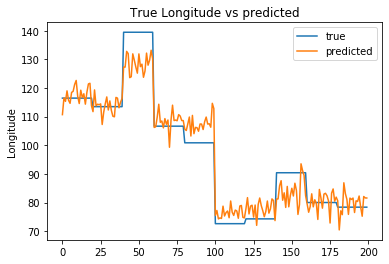

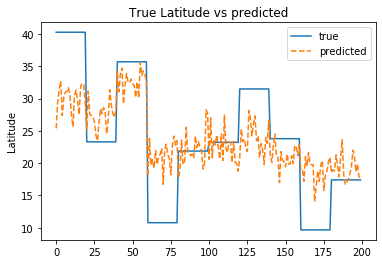

In [92]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

# Root mean squared percentage error
MSE = 1/len(long_pred)*np.sum(np.power(np.divide((Y[:,0] - long_pred), Y[:,0]), 2))
RMSPE = 100* np.power(MSE, 0.5) 
print('Root Mean squared error for Longitude: %.2f'
      % RMSPE, '%')

MSE = 1/len(lati_pred)*np.sum(np.power(np.divide((Y[:,1] - lati_pred), Y[:,1]), 2))
RMSPE = 100* np.power(MSE, 0.5) 
print('Root Mean squared error for Latitude: %.2f'
      % RMSPE, '%')

# The MSPE
MSPE = 100/len(long_pred)*np.sum(np.power(np.divide((Y[:,0] - long_pred), Y[:,0]), 2))
print('Mean Square Percentage Error for Longitude: %.2f'
      % MSPE, '%')
MSPE = 100/len(lati_pred)*np.sum(np.power(np.divide((Y[:,1] - lati_pred), Y[:,1]), 2))
print('Mean Square Percentage Error for Latitude: %.2f'
      % MSPE, '%')



# The coefficient of determination: 1 is perfect prediction
r2 = 100 * r2_score(Y[:,0], long_pred)
print('Coefficient of determination for longitude: %.2f'
      % r2, '%')

r2 = 100*r2_score(Y[:,1], lati_pred)
print('Coefficient of determination for latitude: %.2f'
      % r2, '%')

# Mean averaged percentage error
MAPE = 100/len(long_pred)*np.sum(np.absolute(np.divide((Y[:,0] - long_pred), Y[:,0])))
print('Mean Absolute Percentage Error for longitude: %.2f'
      % MAPE, '%')

MAPE = 100/len(lati_pred)*np.sum(np.absolute(np.divide((Y[:,1] - lati_pred), Y[:,1])))
print('Mean Absolute Percentage Error for latitude: %.2f'
      % MAPE, '%')



# # Plot outputs

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(Y[:,0], label = 'true')
plt.plot(long_pred, label = 'predicted')
ax.set_ylabel('Longitude')
ax.set_title('True Longitude vs predicted')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(Y[:,1],  label = 'true')
plt.plot(lati_pred, '--', label = 'predicted')
ax.set_ylabel('Latitude')
ax.set_title('True Latitude vs predicted')
plt.legend()
plt.show()

## Confidence Interval:
the code block below gives the confidence interval for the trained models.

In [98]:
def confidence_interval(model, X, y):
    
    y_pred = model.predict(X)
    stdev = np.sqrt(sum((y_pred-y)**2))/len(y-2)
    
    print( 'Standard deviation is :', stdev)
    return stdev


In [ ]:
long_stdev = confidence_interval(long_hr_reg, X_test, Y_test)
lati_stdev = confidence_interval(lati_hr_reg, X_test, Y_test)